# **ANALISIS DE LA MORTALIDAD DE ADULTOS EN EL MUNDO**
## Tasa de mortalidad de adultos en Python (2019-2021)

## 1.- Descripción del Problema

### *Objetivo:*
 Analizar la tasa de mortalidad de adultos y la relación con distintos factores como el el PIB promedio del pais y la Inversión en Salud. Realizar regresiones con un modelo XG-Boost para entrenar los datos con un 70% y predecir la Tasa Global de Mortalidad de Adultos.

  Herramientas:
  Google Colab (Python) Librerías: seaborn, pandas, matplotlib, numpy, Scikit-learn


### *Hipótesis:*

  Se cree que debe haber una relación muy marcada entre la tasa de mortalidad promedio(Average_CDR) y el PIB_promedio del pais en Millones de Dolares(Average_GDP(M$)) ?

  También que debe haber una relación muy evidente entre la inversión en salud con respecto de la Tasa de Mortalidad
  (Average_CDR) vs (Average_HEXP($))

 Variable Objetivo: Average_CDR


### Contexto del Conjunto de Datos:
El Dataset elegido tiene información sobre la tasa de mortalidad de Adultos en distintos Paises y algunas columnas o factores que afectan a ésta misma.

Las columnas del archivo analizado contiene son las siguientes:

* Países: País de estudio.
* Continente: Continente del Pais
* Average_Pop:: Población promedio en miles.
* PIB_promedio: PIB promedio del país en millones de dólares.
* PIB_per_cápita_promedio: PIB per cápita promedio en dólares.
* Average_HEXP: Gasto en Salud Per Cápita en dólares.
* Nivel de desarrollo: Nivel de desarrollo del estado en estudio
* AMR_female: Mortalidad promedio de mujeres adultas por cada 1000 por año
* AMR_male: Mortalidad promedio de hombres adultos por cada 1000 por año
* Average_CDR: Tasa bruta de mortalidad promedio

## 2.- Análisis Exploratorio de Datos (EDA):

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #Debemos confirmar acceso a nuestra cuenta para el COLAB
#print(drive.mount)  #Imprime una direccion hexadecimal del apuntador a la carpeta drive
#%cd "/content/drive/My Drive/Colab Notebooks/CienciadeDatosConPython/3DatosPractica"
%cd '/content/drive/MyDrive/Colab Notebooks/UDC DiplomadoCienciaDatos/CasoPractico'
%pwd
%ls

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/UDC DiplomadoCienciaDatos/CasoPractico
'Adult mortality rate (2019-2021).csv'   CasoPractico_Modulo7.ipynb   university_admission.csv
'Caso Practico.ipynb'                    Life_Expectancy_Data.csv


### 2.1 Importando Librerías

In [ ]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Leer el fichero CSV
df = pd.read_csv("Adult mortality rate (2019-2021).csv")

In [ ]:
# Cargar los primeros 5 registros del dataset
df.head(5)

,Countries,Continent,Average_Pop(thousands people),Average_GDP(M$),Average_GDP_per_capita($),Average_HEXP($),Development_level,AMR_female(per_1000_female_adults),AMR_male(per_1000_male_adults),Average_CDR
0,Afghanistan,Asia,38947.06,17995.64,462.05,80.53,Short,204.85,322.17,7.08
1,Albania,Europe,2834.57,16263.16,5737.44,420.17,Short,53.54,103.55,10.20
2,Algeria,Africa,43445.00,160325.54,3690.31,215.53,Short,70.85,102.21,4.78
3,Angola,Africa,33428.62,72148.29,2158.28,61.29,Short,218.03,316.81,7.88
4,Antigua and Barbuda,North America,92.67,1509.63,16290.97,868.60,Average,58.76,103.77,6.06


In [ ]:
# Cargar los últimos 5 registros del dataset
df.tail(5)

,Countries,Continent,Average_Pop(thousands people),Average_GDP(M$),Average_GDP_per_capita($),Average_HEXP($),Development_level,AMR_female(per_1000_female_adults),AMR_male(per_1000_male_adults),Average_CDR
151,Uzbekistan,Asia,34242.50,62977.99,1839.18,127.24,Short,121.32,204.67,4.90
152,Vanuatu,Australia,311.74,939.19,3012.72,122.06,Short,136.51,192.91,5.52
153,Viet Nam,Asia,96631.14,349039.52,3612.08,173.11,Short,73.97,178.17,6.73
154,Zambia,Africa,18927.11,21188.98,1119.50,79.17,Short,231.56,341.14,6.72
155,Zimbabwe,Africa,15672.60,29625.67,1890.28,57.28,Short,308.08,423.15,8.41


In [ ]:
# Mostrar las características / columnas
df.columns

Index(['Countries', 'Continent', 'Average_Pop(thousands people)',
       'Average_GDP(M$)', 'Average_GDP_per_capita($)', 'Average_HEXP($)',
       'Development_level', 'AMR_female(per_1000_female_adults)',
       'AMR_male(per_1000_male_adults)', 'Average_CDR'],
      dtype='object')

In [ ]:
# Comprobar la dimensión del dataframe
df.shape

(156, 10)

In [ ]:
# Comprobar si hay valores faltantes en el dataframe o a hay algun dato nulo?
df.isnull().sum()

,0
Countries,0
Continent,0
Average_Pop(thousands people),0
Average_GDP(M$),0
Average_GDP_per_capita($),0
Average_HEXP($),0
Development_level,0
AMR_female(per_1000_female_adults),0
AMR_male(per_1000_male_adults),0
Average_CDR,0


In [ ]:
#Si hubiera datos faltantes, los eliminareos y trabajos con el nuevo data frame
# df = df.dropna()
print('No hubo necesidad de eliminar nulos, el dataset esta totalmente limpio')

No hubo necesidad de eliminar nulos, el dataset esta totalmente limpio


In [ ]:
#Cuales son los tipos de datos de nuestas columnas
df.dtypes

,0
Countries,object
Continent,object
Average_Pop(thousands people),float64
Average_GDP(M$),float64
Average_GDP_per_capita($),float64
Average_HEXP($),float64
Development_level,object
AMR_female(per_1000_female_adults),float64
AMR_male(per_1000_male_adults),float64
Average_CDR,float64


In [ ]:
#Consultando Estadística de los Datos
df.describe()

,Average_Pop(thousands people),Average_GDP(M$),Average_GDP_per_capita($),Average_HEXP($),AMR_female(per_1000_female_adults),AMR_male(per_1000_male_adults),Average_CDR
count,1.560000e+02,1.560000e+02,156.000000,156.000000,156.000000,156.000000,156.000000
mean,4.145031e+04,3.636484e+05,14009.898974,1165.549551,130.893590,202.383013,8.143654
std,1.616104e+05,1.402295e+06,20315.146615,1875.714534,84.503337,103.804217,2.953754
min,1.108000e+01,5.531000e+01,257.740000,18.920000,24.060000,46.790000,1.170000
25%,2.092582e+03,1.122715e+04,1987.862500,93.247500,62.440000,113.475000,6.397500
50%,8.778430e+03,3.613559e+04,5819.610000,408.170000,109.050000,195.000000,7.615000
75%,2.692418e+04,2.223658e+05,16348.190000,1154.520000,184.642500,269.897500,9.387500
max,1.410402e+06,1.565411e+07,121304.680000,10107.990000,411.090000,524.480000,18.400000


## 2.2 Análisis exploratorio y visualización de datos (EDA)

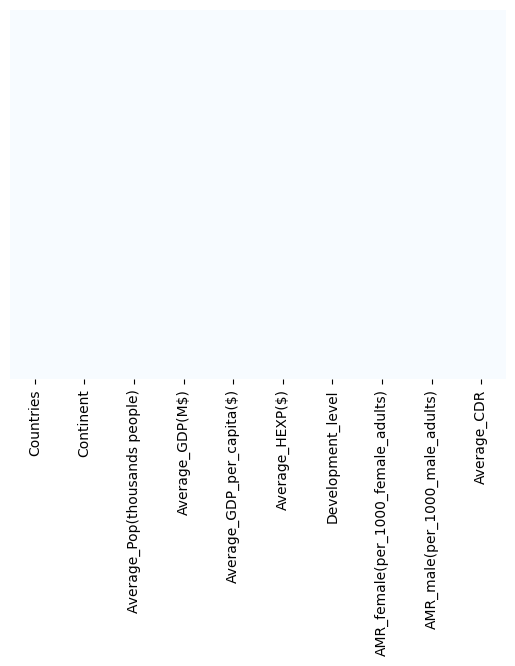

El dataset esta totalmente limpio


In [ ]:
# Comprobar si hay algún valor nulo
sb.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()
## Verificamos gráficamente que el dataset sta totalmente limpio
print('El dataset esta totalmente limpio')

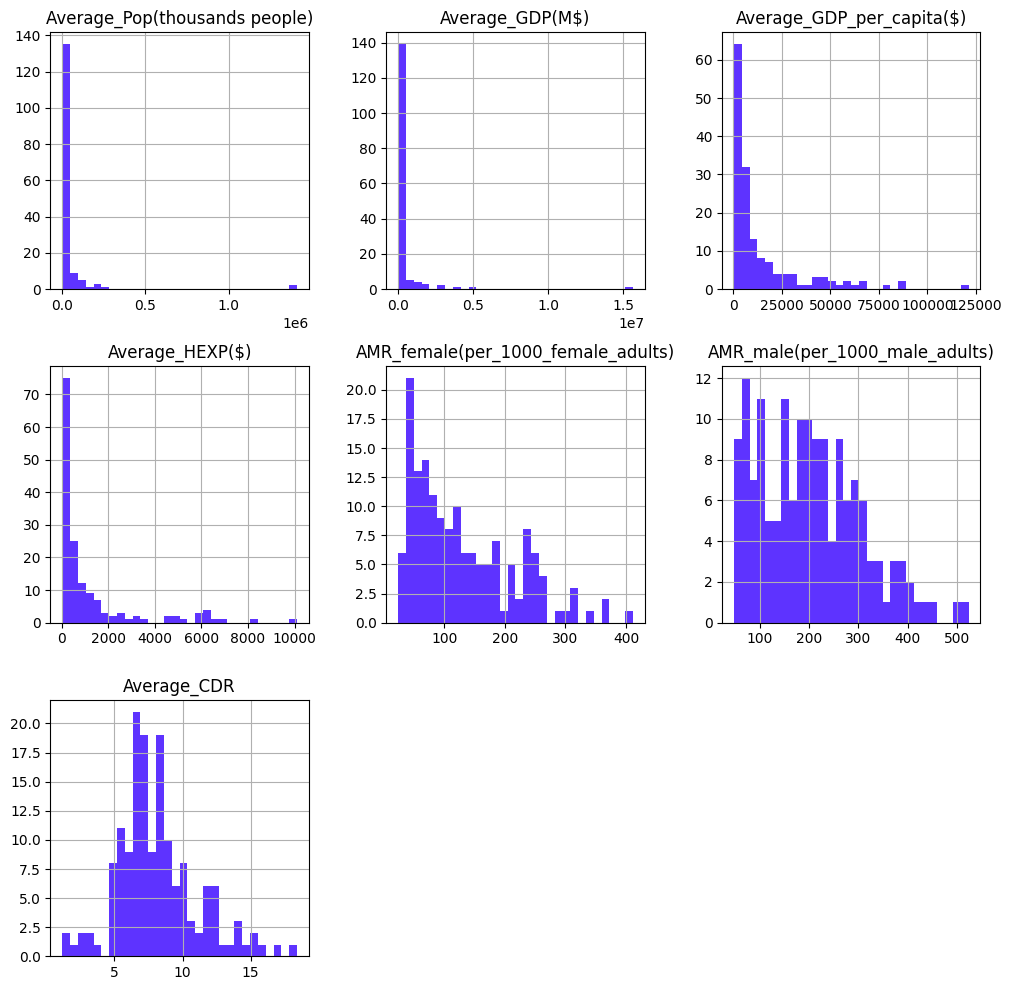

In [ ]:
#Mostrando histográma de todas las columnas numéricas
df.hist(bins = 30, figsize = (12,12), color = '#5e33ff');
plt.show()

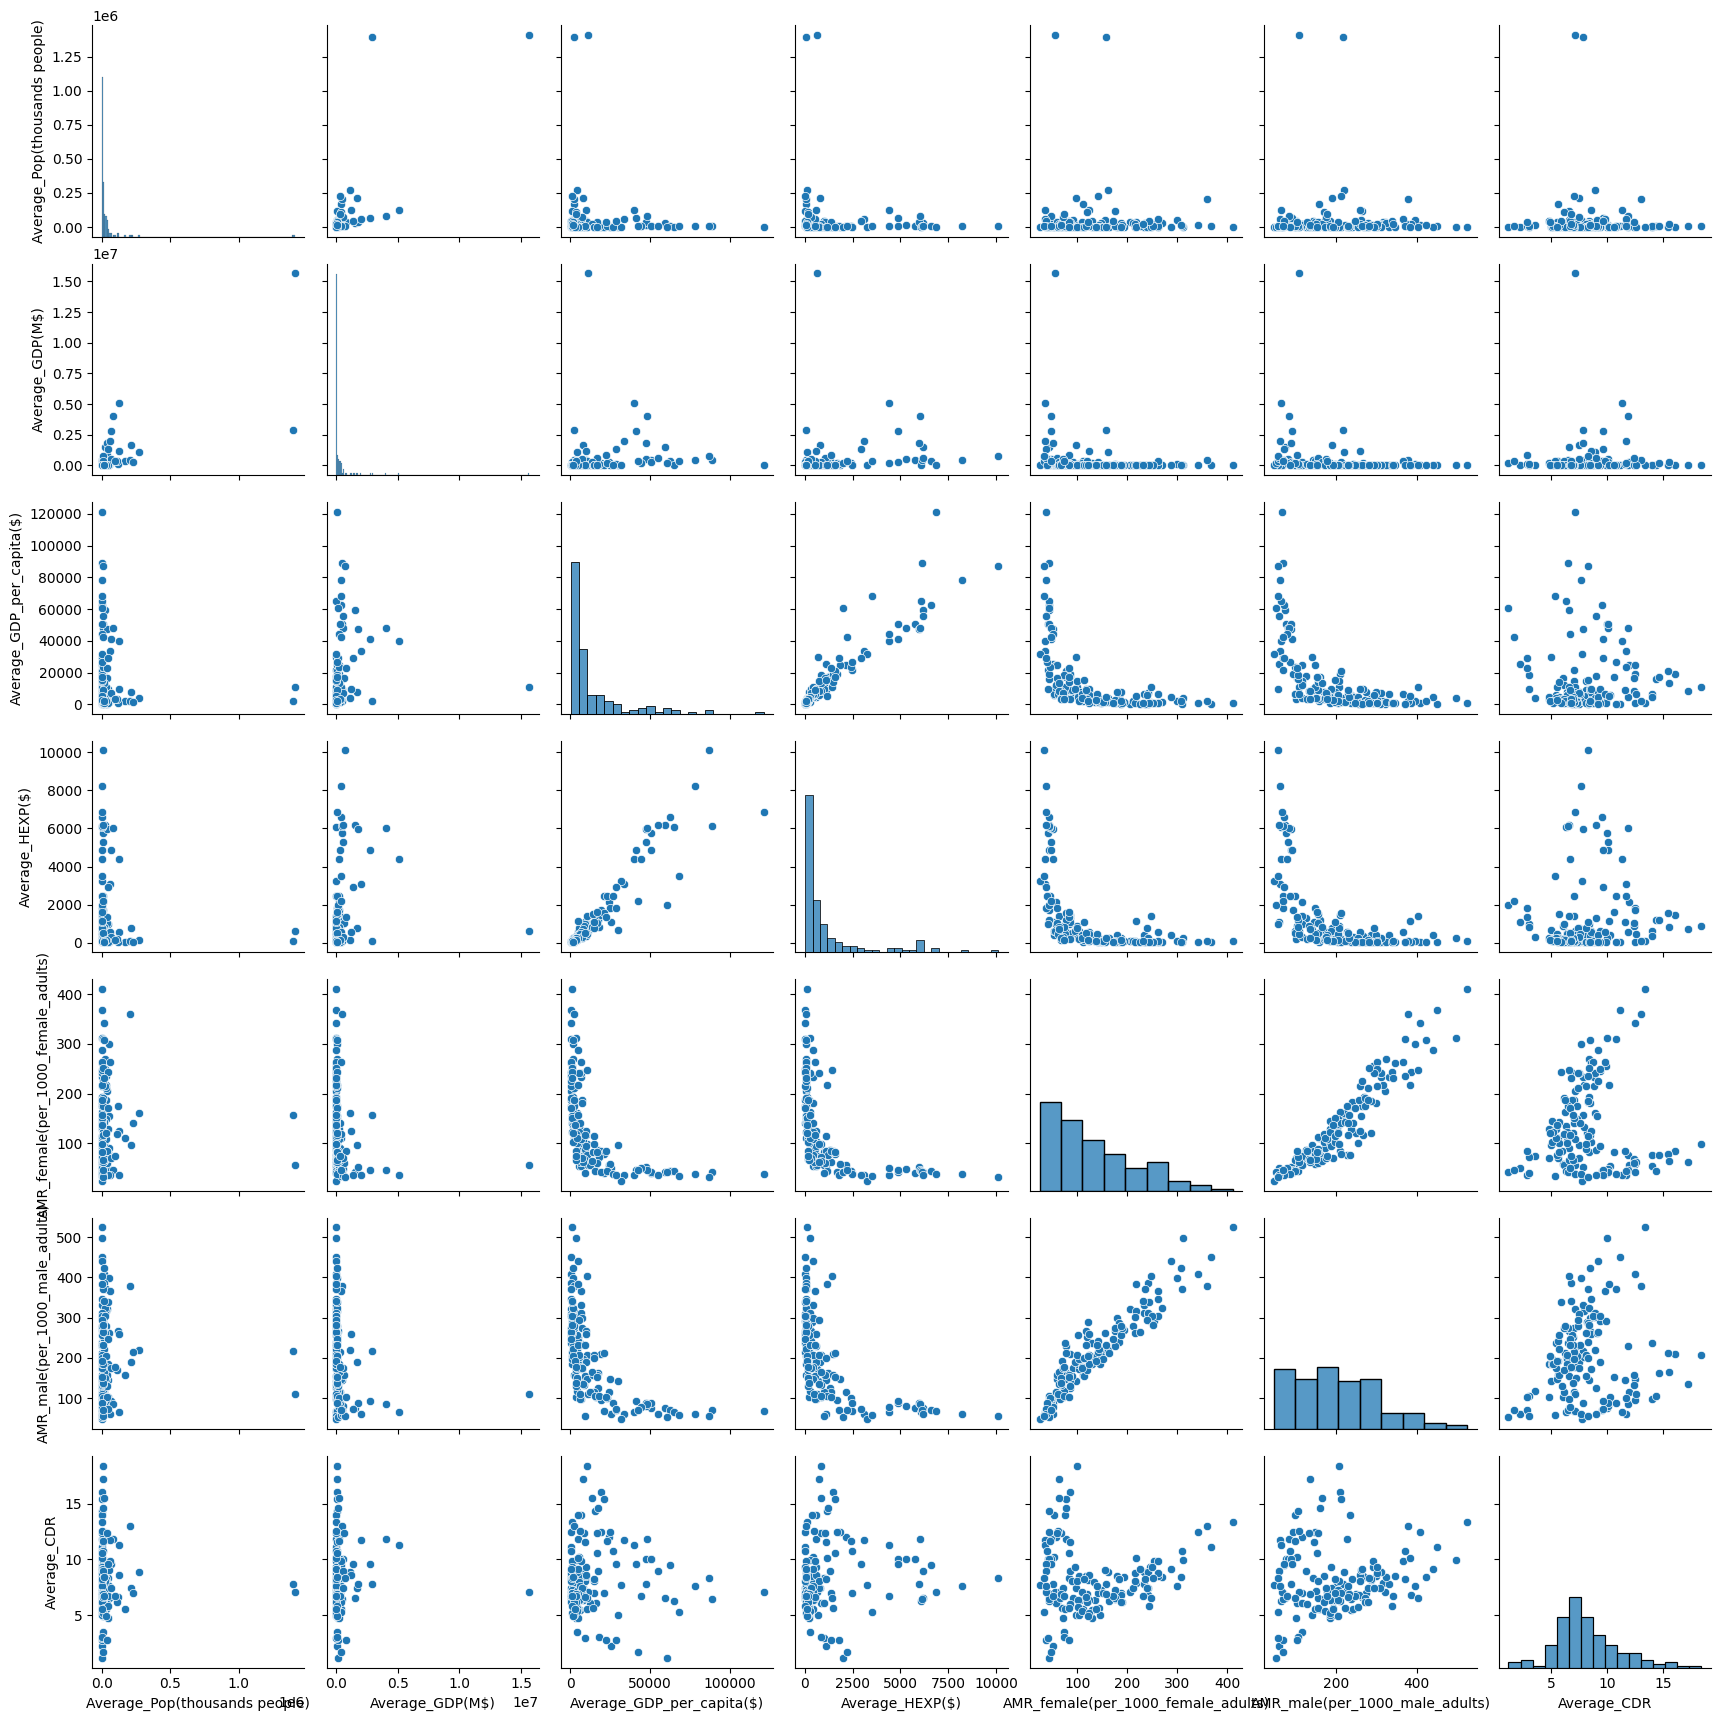

In [ ]:
#Gráficos de dispersión entre todas las columnas y distribuciones
sb.pairplot(df)
plt.show()

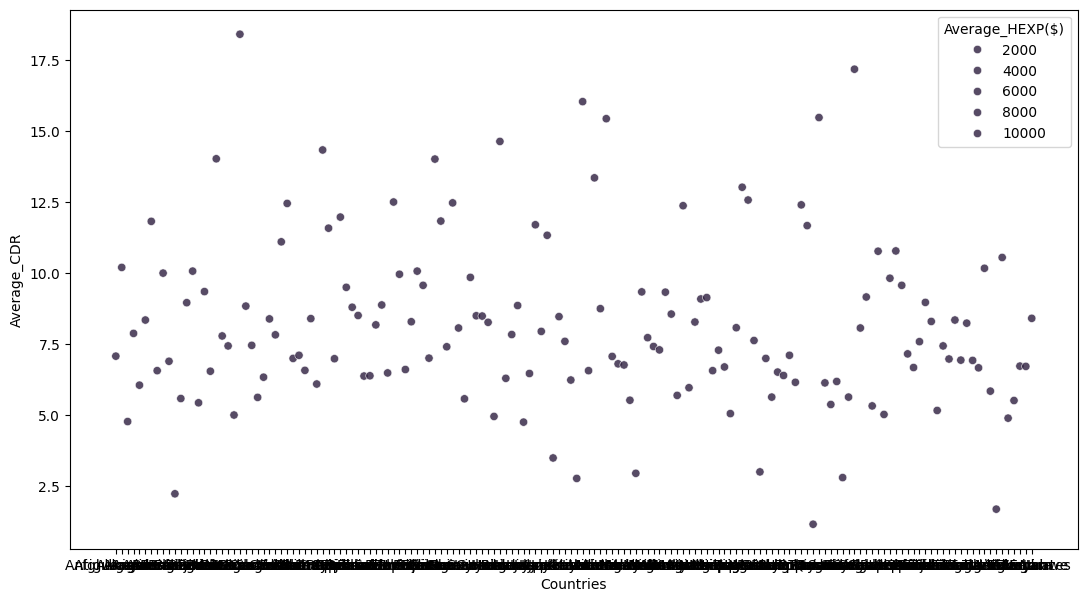

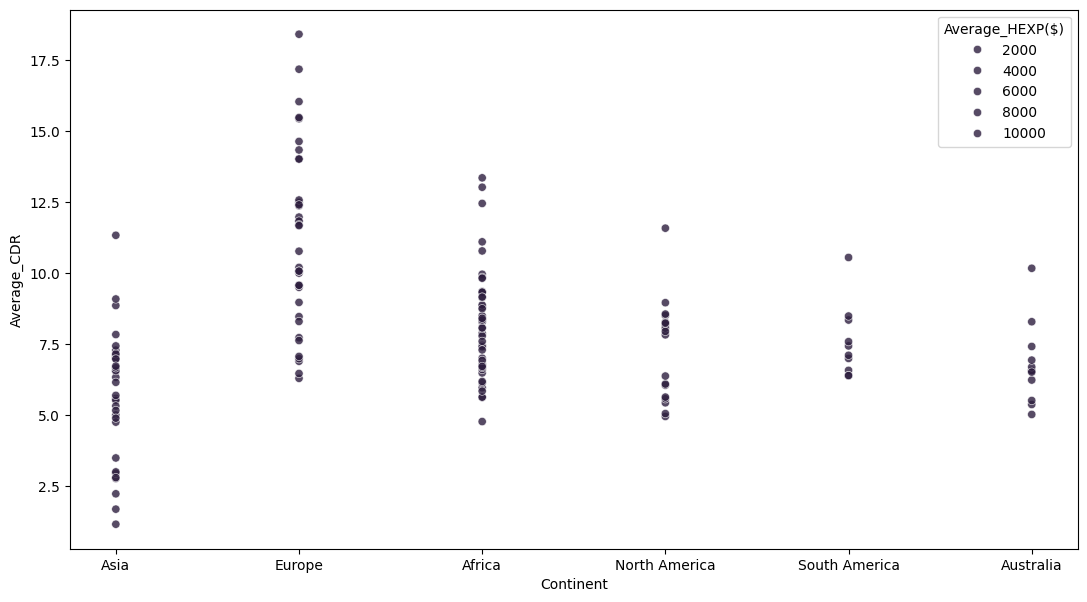

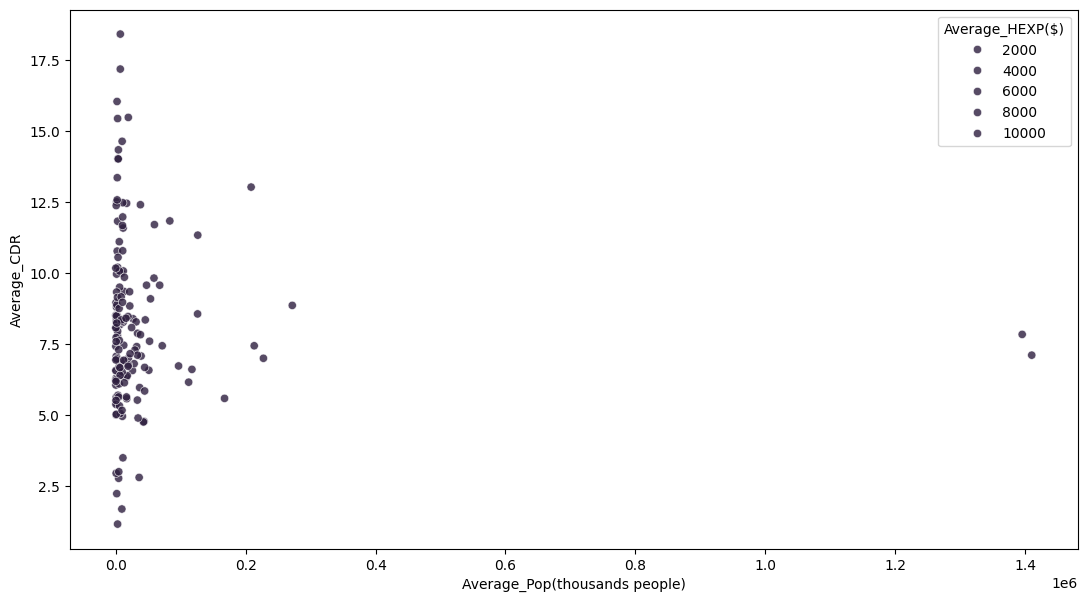

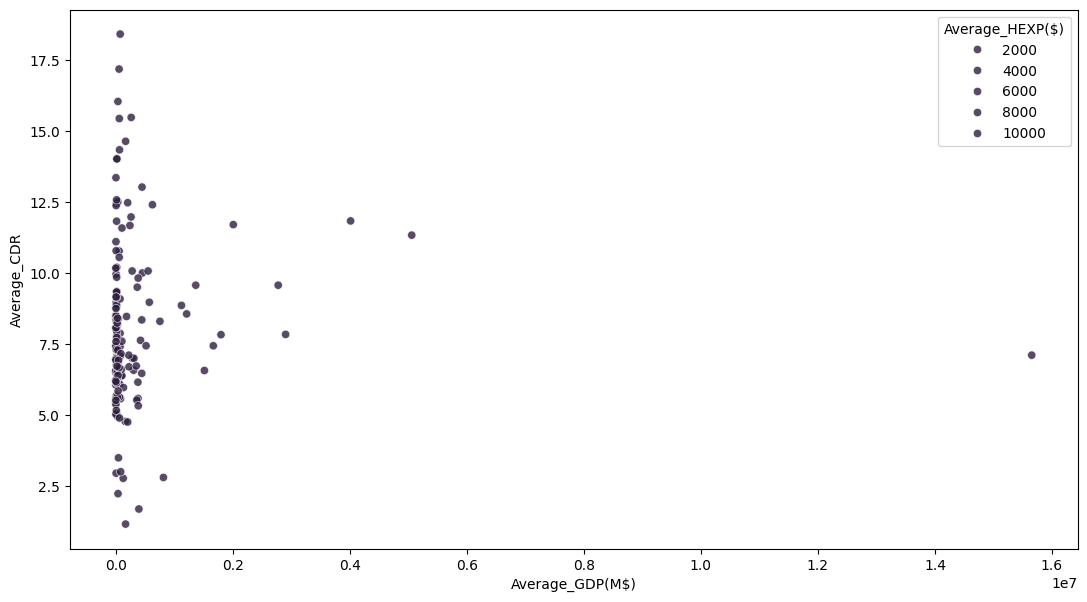

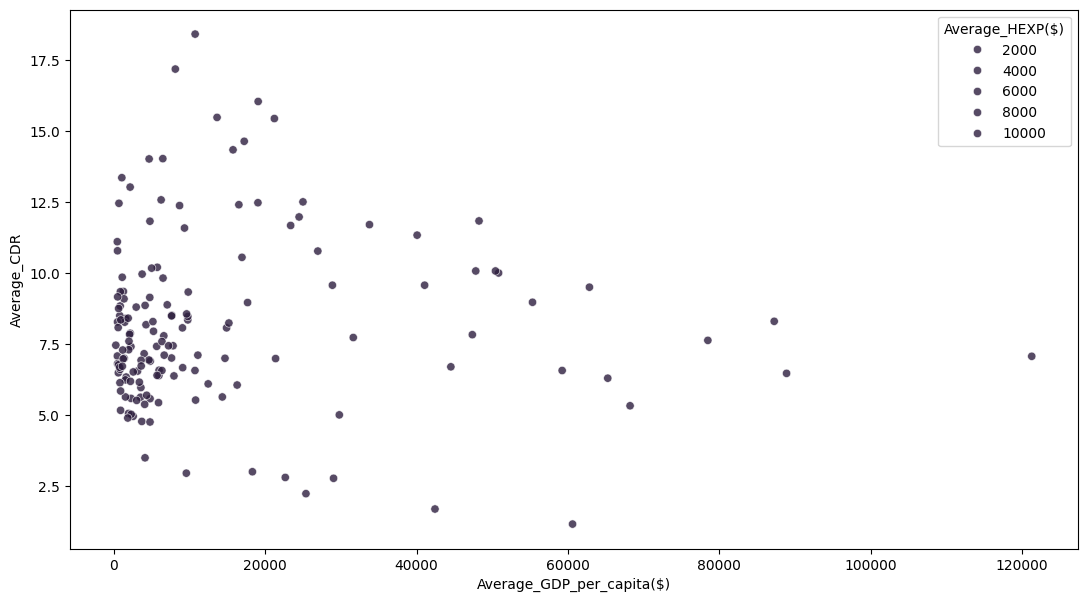

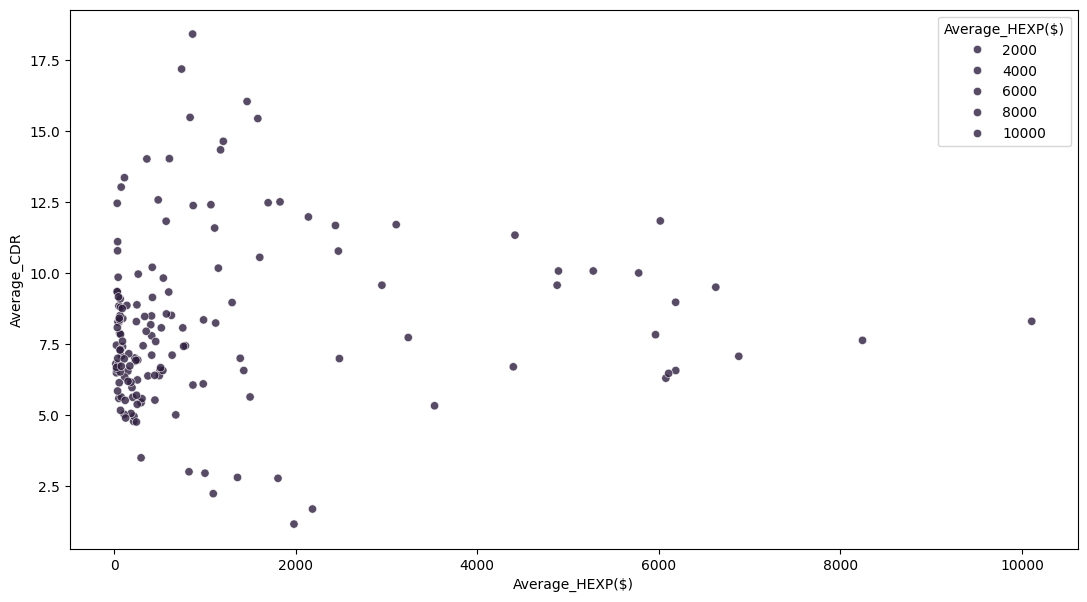

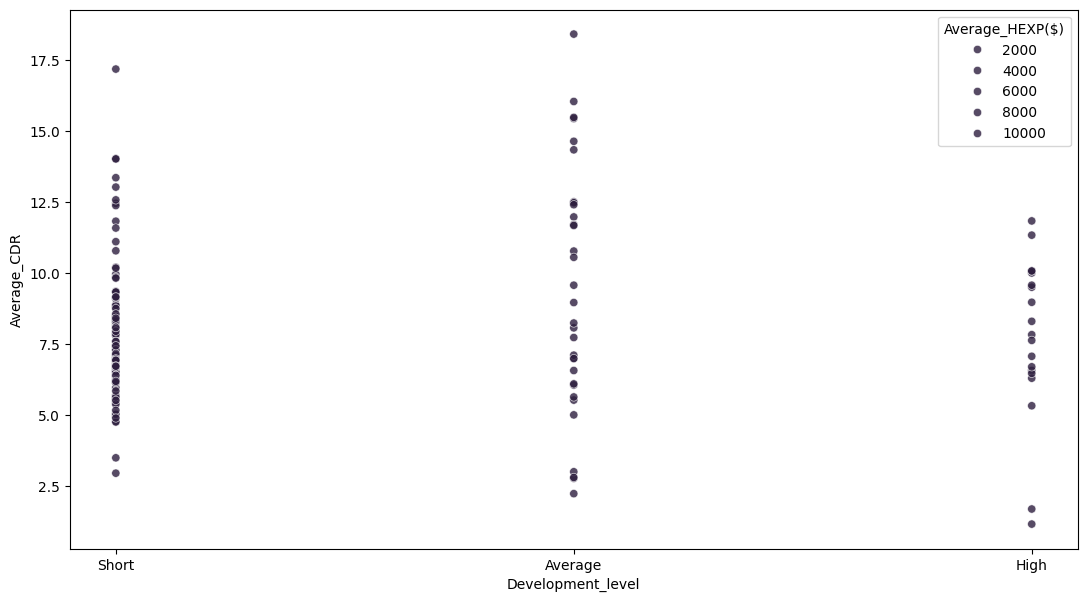

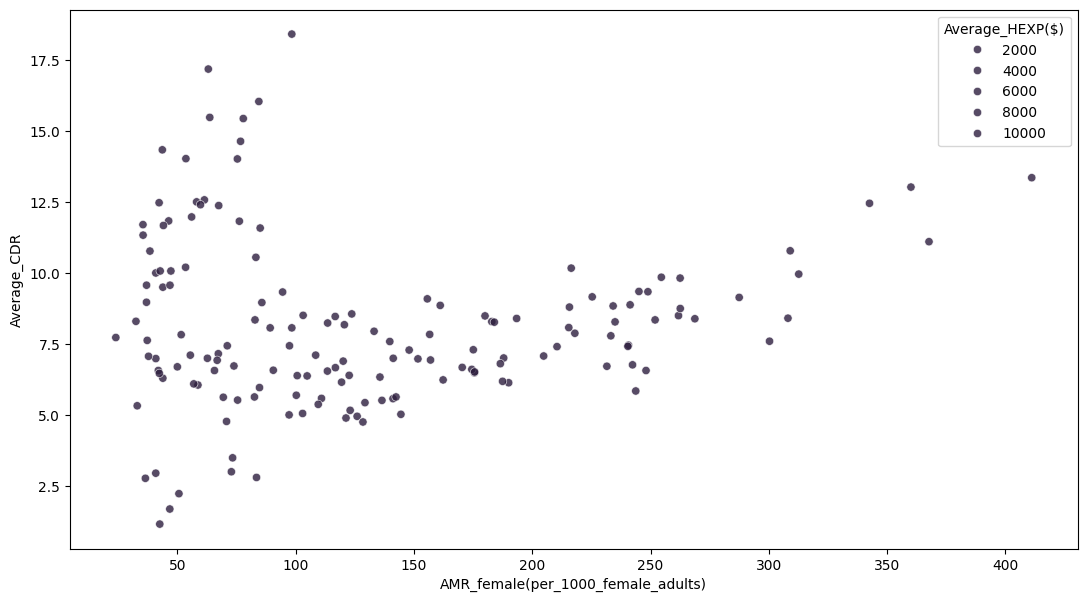

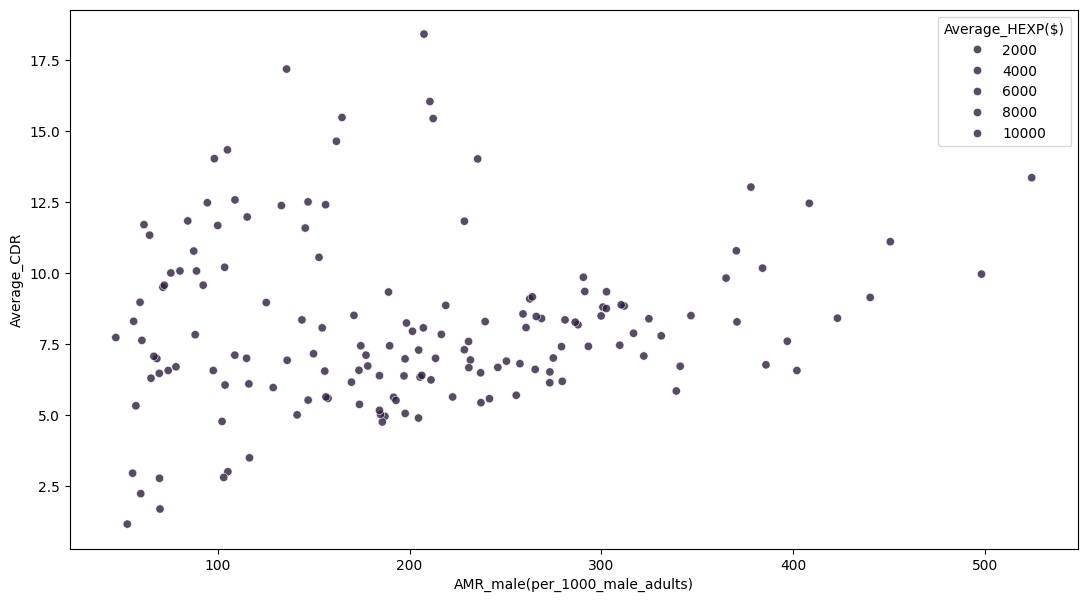

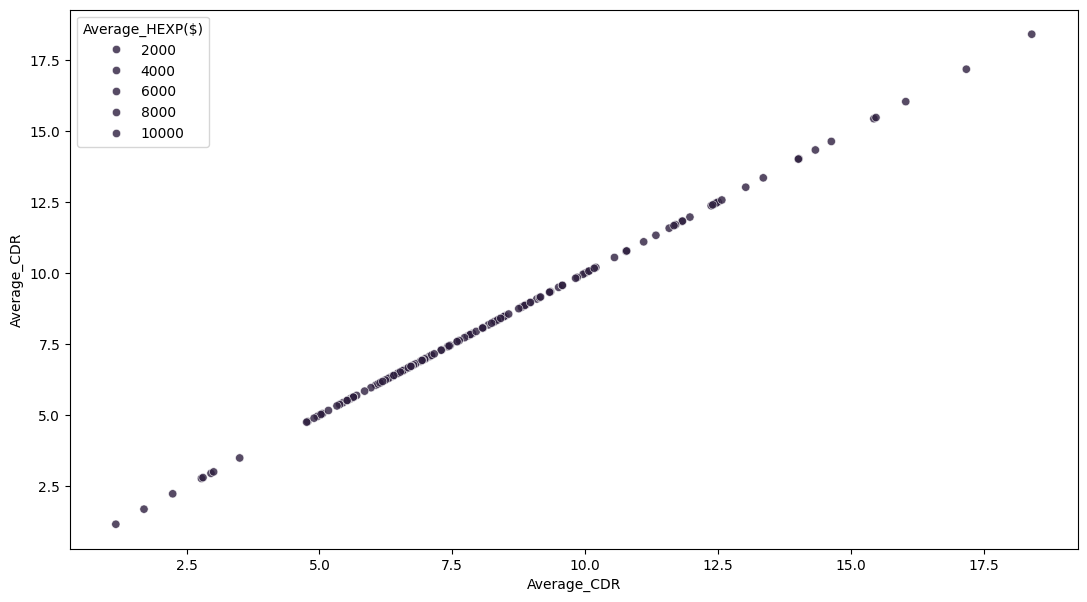

In [ ]:
#Mostrando relación entre la variables y=Average_GDP(M$) gráficando por items Average_CDR
#y x= (de TODAS las Columnas del dataset)
for i in df.columns:
  plt.figure(figsize = (13, 7))
  sb.scatterplot(x = i, y = 'Average_CDR', hue = "Average_HEXP($)", hue_norm = (1,5), data = df, color = '#5e33ff', alpha=0.8)
  plt.show()

### *Resultados del análisis exploratorio*
Se observa visiblemente que las tasas registradas de la mayoría de los países, se concentran a la izquierda, es decir: La Mayoría de los países cuentan con un PIB promedio bajo y Gastos en Salud bajos con respecto de otros.

Pero eso no quiere decir que la Tasa de Mortalidad disminuya en función de esa variable. Ya que se observa claramente que a pesar de ser un presupuesto bajo
hay países con Tasas Altas, Medias y Bajas distribuidos uniformemente.

Aun no es posible confirmar la hipótesis, por lo tanto es necesario hacer un análisis de correlación para determinar el impacto en la variable objetivo

## 3.- Preparación de los Datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Countries                           156 non-null    object 
 1   Continent                           156 non-null    object 
 2   Average_Pop(thousands people)       156 non-null    float64
 3   Average_GDP(M$)                     156 non-null    float64
 4   Average_GDP_per_capita($)           156 non-null    float64
 5   Average_HEXP($)                     156 non-null    float64
 6   Development_level                   156 non-null    object 
 7   AMR_female(per_1000_female_adults)  156 non-null    float64
 8   AMR_male(per_1000_male_adults)      156 non-null    float64
 9   Average_CDR                         156 non-null    float64
dtypes: float64(7), object(3)
memory usage: 12.3+ KB


In [ ]:
#Excluyendo columnas para poder realizar una matriz de correlación
#en este caso las 2 columnas a excluir fueron Countries y Continent
df = df.select_dtypes(exclude = ['object'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Average_Pop(thousands people)       156 non-null    float64
 1   Average_GDP(M$)                     156 non-null    float64
 2   Average_GDP_per_capita($)           156 non-null    float64
 3   Average_HEXP($)                     156 non-null    float64
 4   AMR_female(per_1000_female_adults)  156 non-null    float64
 5   AMR_male(per_1000_male_adults)      156 non-null    float64
 6   Average_CDR                         156 non-null    float64
dtypes: float64(7)
memory usage: 8.7 KB


In [ ]:
#Generando matriz de correlación
df.corr()

,Average_Pop(thousands people),Average_GDP(M$),Average_GDP_per_capita($),Average_HEXP($),AMR_female(per_1000_female_adults),AMR_male(per_1000_male_adults),Average_CDR
Average_Pop(thousands people),1.000000,0.758543,-0.066542,-0.064363,-0.016317,-0.033246,-0.022486
Average_GDP(M$),0.758543,1.000000,0.145755,0.183883,-0.186499,-0.202705,0.034081
Average_GDP_per_capita($),-0.066542,0.145755,1.000000,0.931426,-0.545128,-0.606173,-0.010877
Average_HEXP($),-0.064363,0.183883,0.931426,1.000000,-0.519342,-0.577129,0.089068
AMR_female(per_1000_female_adults),-0.016317,-0.186499,-0.545128,-0.519342,1.000000,0.942350,0.064588
AMR_male(per_1000_male_adults),-0.033246,-0.202705,-0.606173,-0.577129,0.942350,1.000000,0.132448
Average_CDR,-0.022486,0.034081,-0.010877,0.089068,0.064588,0.132448,1.000000


Average_HEXP($) y Average_GDP(M$)  tienen un bajo impacto sobre la variable objetivo: Average_CDR

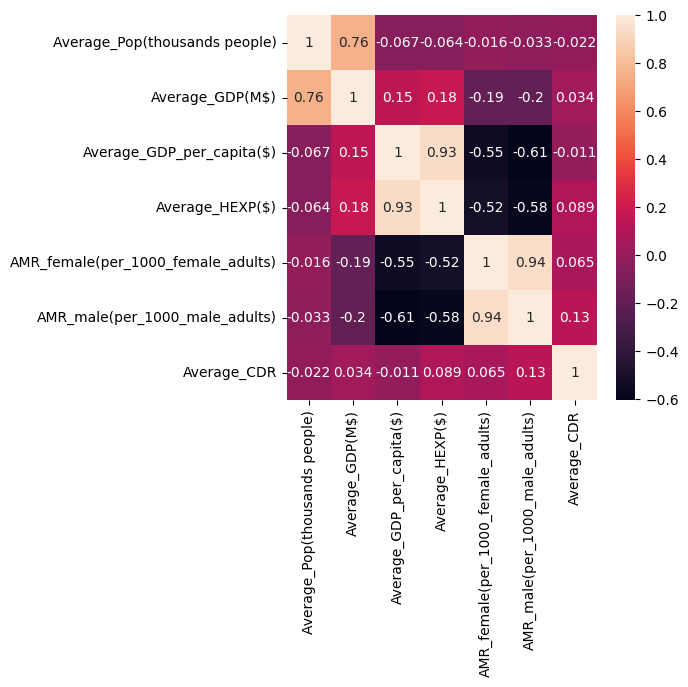

In [ ]:
matriz_correlacionada = df.corr()
plt.figure(figsize = (5, 5))
sb.heatmap(matriz_correlacionada, annot = True)
plt.show()

### Hallazgos en matriz de correlación

Resultados:

Variable Objetivo: Average_CDR
* Invesión en Salud Average_HEXP($) no tiene un impacto significativo en la   variable objetivo con una medición de 0.089

*PIB Promedio Average_GDP(M$)  tiene un relación débil en la   variable objetivo con una medición de 0.034

Por lo tanto: No se confirma la Hipótesis!
Porque realmente el PIB de cada pais y su inversión en Salud no tiene impacto considerable sobre la variable objetivo: Tasa bruta de mortalidad promedio
Average_CDR


## 4.- Modelado Predictivo

### 4.1 - Preparando los datos antes del entrenamiento

In [ ]:
df.columns

Index(['Average_Pop(thousands people)', 'Average_GDP(M$)',
       'Average_GDP_per_capita($)', 'Average_HEXP($)',
       'AMR_female(per_1000_female_adults)', 'AMR_male(per_1000_male_adults)',
       'Average_CDR'],
      dtype='object')

In [ ]:
X = df.drop(columns = ['Average_CDR'])  #Elinemos  la columna, por que la ocupamos predecir (y)

In [ ]:
y = df['Average_CDR'] #Nuestra variable objetivo

In [ ]:
X.shape  #dimensión de X

(156, 6)

In [ ]:
y.shape #dimensión de y

(156,)

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
# Redimensionar el array de (156,) a (156, 1)
y = y.reshape(-1,1)
y.shape

(156, 1)

Nota: No hubo necesidad de escalar los datos antes de entrenar el modelo

### 4.2 Entrenando el Modelo

Dividir los datos en un 30% de prueba y un 70% de entrenamiento.
Comprobar que la división se ha realizado correctamente obteniendo la dimensión de los conjuntos de datos de prueba y entrenamiento.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [ ]:
X_train.shape  #Visualizando X Entrenado

(109, 6)

In [ ]:
X_test.shape #Visualizando X de Prueba o muestra

(47, 6)

### 4.3 Implementando Algoritmo XG-Boost

In [ ]:
!pip install xgboost #instalando librería xgboost

In [ ]:
import xgboost as xgb

#Aplicando Regresión utilizando métrica: Error al cuadratico
#con una tasa de aprendizaje de 0.1 y 400 árboles de decición o estimadores
modelo = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 30, n_estimators = 400)
modelo.fit(X_train, y_train) #ajustando datos

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=30, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predecir puntuación o Tasa de Mortalidad del modelo entrenado utilizando el conjunto de datos de prueba

result = modelo.score(X_test, y_test) #le damos una puntuacion segun el modelo de entrenamiento
print("Certeza : {}".format(result))

Certeza : -0.21666472402827597


La certeza fue negativa la cual indica que la Tasa de Mortalidad es muy aleatoria y es muy poco impactada por los factores elegidos en la hipótesis
por lo tanto se entiende finalmente que la correlación con las otras variables factores es muy baja

In [ ]:
# Realizar predicciones en el conjunto de pruebas
y_predict = modelo.predict(X_test)


In [ ]:
y_predict #la prediccion de la Tasa de Mortalidad, el primer pais tiene una tasa de 8.2 muertos por día

array([ 8.20913  ,  7.3163233,  6.7212405, 12.009821 ,  9.649069 ,
       11.999591 ,  8.743903 ,  9.69745  ,  8.9049635,  5.3488746,
        9.137202 ,  8.909599 ,  5.9835563,  7.1531854,  7.2732725,
        4.982232 , 12.321431 ,  8.224626 , 12.967805 ,  7.854475 ,
        7.2481675,  7.9821954,  9.538231 ,  8.816595 ,  9.597135 ,
        8.862721 ,  9.586707 , 10.454928 ,  7.808594 ,  7.6354513,
        9.787875 ,  9.874938 ,  8.692183 , 11.604166 ,  7.5242944,
        5.24651  ,  6.9322767,  8.997993 , 12.2029915,  9.571728 ,
        4.9811816,  7.253622 ,  7.321261 ,  7.334919 ,  5.764313 ,
        6.6821027,  6.6216435], dtype=float32)

# 5.- Evaluación del Modelo

In [64]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
n = len(X_test)
k = X_test.shape[1]
print(k)
print("La cantidad de datos de prueba es: ", n)
print("La cantidad de datos de entrenamiento es: ", len(X_train))
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f')) #3 decimales
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
ajuste_r2 = 1 - (1-r2) * (n-1) / (n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, 'El valor ajustado de r2 = ', ajuste_r2)

##RMSE fue alto lo cual indica que el modelo tiene una buena predicción
#R2 0.16  indica un 16% en la variación de los datos

#Se concluye que el modelo de predicción es efectivo segun la muestra entrenada
#Pero la Hipótesis planteada fue respondida desde la correlación.

6
La cantidad de datos de prueba es:  47
La cantidad de datos de entrenamiento es:  109
RMSE = 2.825 
MSE = 7.979743166461337 
MAE = 1.9815516873623464 
R2 = -0.21666472402827597 El valor ajustado de r2 =  -0.39916443263251744


# 6.- Visualización de Resultados

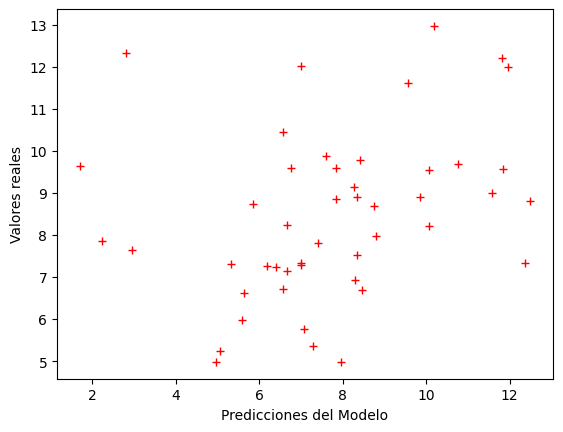

In [ ]:
#Graficando las prediciones generadas
plt.plot(y_test, y_predict, "+", color = "red")
plt.xlabel("Predicciones del Modelo")
plt.ylabel("Valores reales")
plt.show()


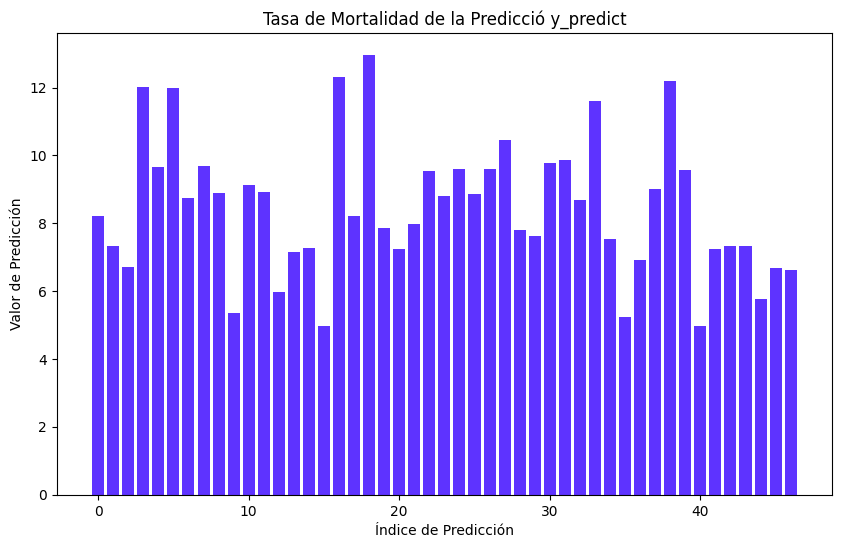

In [ ]:
#Grafico de Barras de Y_predict
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(range(len(y_predict)), y_predict, color='#5e33ff')
plt.xlabel("Índice de Predicción")
plt.ylabel("Valor de Predicción")
plt.title("Tasa de Mortalidad de la Predicció y_predict")
plt.show()


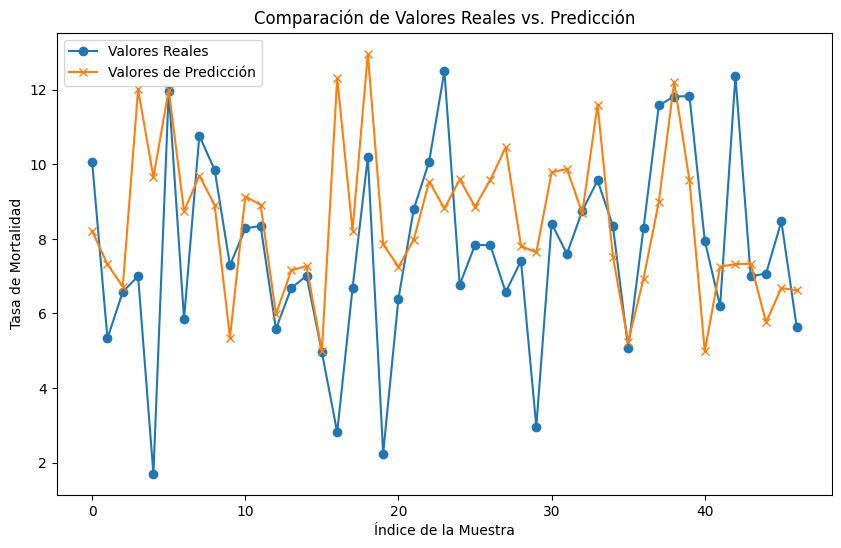

In [65]:
#gráfico comparativo de y_test vs t_predict
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Valores Reales', marker='o')
plt.plot(y_predict, label='Valores de Predicción', marker='x')
plt.xlabel('Índice de la Muestra')
plt.ylabel('Tasa de Mortalidad')
plt.title('Comparación de Valores Reales vs. Predicción')
plt.legend()
plt.show()


Analizando el gráfico de la predicción vs los valores reales de muestra gráficamente se observa que la precisión de la predicción es aproximada pero con ciertos márgenes de error, pero a final de cuentas el algoritmo cumplió con su objetivo, Se observa también que mantienen la misma aleatoriedad de las tasas entre los países independientemente de las variables factores planteadas en la hipótesis. Ya que anteriormente en la correlación se determinó que tienen un bajo impacto.

# 7.- Conclusiones y Recomendaciones

Respondiendo a la hipótesis se logró determinar que la variable objetivo
"Tasa de Mortalidad", es poco impactada por lo factores elegidos en la hipótesis como: PIB del Pais e Inversión en Salud ya que los datos registrados en el dataset realmente estan muy dispersos o aleatorios.

La correlación con las otras variables es muy baja, entendiendo que cada país por cuestiones de cultura, nivel de desarrollo económico, idiosincrasia , desarrollo social es diferente en cada uno de éstos y evidentemente causaran una aleatoriedad en la Tasa de Mortalidad

Quiza se lograría un resultado más certero haciendo prediciones de la tasa de mortalidad, con registros del mismo pais durante varios años para poder tener una correlación con más impacto entre las otras variables factores.

# 8.- Despliegue del Modelo

El Modelo si puede ser implementado en un entorno productivo en una API o WEB SERVICE con los siguientes métodos básicos.

API /Web Servicice
1.- Con un Método para la Alta o Captura de Registros de la Tasa de Mortalidad y sus factores de cada pais, y por cada Año transcurrido

2.- Un Método de consulta para generar predicciones de Tasa de Mortalidad
con parámetros para una consulta más dinámica como:
  +Continente (opcional)
  +Pais(opcional)
  +Métrica
  +Tasa Aprendizaje
  +No. Estimadores


Una vez construida la API o WebService pueden integrarse en Páginas Web, Aplicaciones Móviles o Aplicaciones de escritorio para fines que al interesado convengan
